<a href="https://colab.research.google.com/github/utkarshg1/Neural-Net-Datasets/blob/main/Sentiment_Analysis_with_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
df = pd.read_csv(url, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
import re

In [4]:
def preprocess_text(st: str) -> str:
  st = st.lower()
  st = re.sub("[^a-z ]", "", st)
  return st

In [5]:
preprocess_text("Wow... Loved this place.")

'wow loved this place'

In [6]:
df["pre"] = df["Review"].apply(preprocess_text)
df.head()

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


In [7]:
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(df["pre"]).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_pre.shape

(1000, 2046)

In [9]:
# Dimensionality Reduction
n_components = 200
svd = TruncatedSVD(n_components=n_components)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red

array([[ 0.11461801,  0.19099659,  0.29816859, ..., -0.08527553,
         0.04333744, -0.00893085],
       [ 0.20017343,  0.06071891,  0.10379741, ..., -0.01548757,
        -0.00114357,  0.0147091 ],
       [ 0.24821208, -0.05924485, -0.09234426, ...,  0.02535142,
        -0.06815464,  0.00083668],
       ...,
       [ 0.25688491,  0.21248416, -0.25346511, ...,  0.04676529,
         0.00694494, -0.03939553],
       [ 0.21744036,  0.0447622 , -0.07939012, ..., -0.01783136,
        -0.01943043,  0.03303015],
       [ 0.22289233,  0.02782222, -0.02314213, ..., -0.01302395,
         0.05696718, -0.04711339]])

In [10]:
X_pre_red.shape

(1000, 200)

In [11]:
Y = df[["Liked"]]

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre_red, Y, test_size=0.2, random_state=42)

In [13]:
xtrain.shape

(800, 200)

In [14]:
xtest.shape

(200, 200)

In [15]:
# Build the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_components,), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [18]:
# Train the Model
history = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.4886 - loss: 2.8440 - val_accuracy: 0.5050 - val_loss: 2.1574
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5341 - loss: 1.9836 - val_accuracy: 0.5750 - val_loss: 1.5397
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6009 - loss: 1.4316 - val_accuracy: 0.6750 - val_loss: 1.1663
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6176 - loss: 1.1030 - val_accuracy: 0.6350 - val_loss: 0.9506
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6246 - loss: 0.9139 - val_accuracy: 0.7300 - val_loss: 0.8292
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6896 - loss: 0.8063 - val_accuracy: 0.5950 - val_loss: 0.7637
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6816 - loss: 0.7475 - val_accuracy: 0.7050 - val_loss: 0.7264
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7677 - loss: 0.7099 - val_accuracy: 0.7400 -

In [19]:
import matplotlib.pyplot as plt

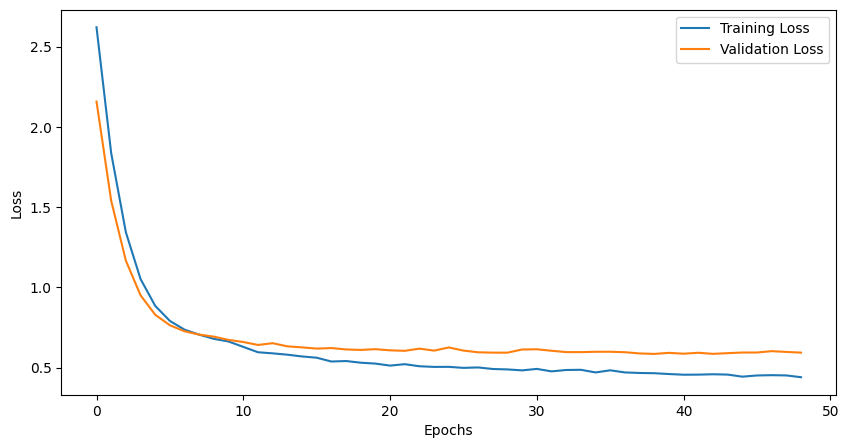

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.4276 


[0.4301512539386749, 0.9200000166893005]

In [22]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7910 - loss: 0.6077 


[0.5853691101074219, 0.800000011920929]

In [24]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[0.712877  ],
       [0.9373227 ],
       [0.95077574],
       [0.92844653],
       [0.7128876 ]], dtype=float32)

In [25]:
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[1, 1, 1, 1, 1]

In [26]:
ytest[0:5]

,Liked
521,1
737,1
740,1
660,1
411,1


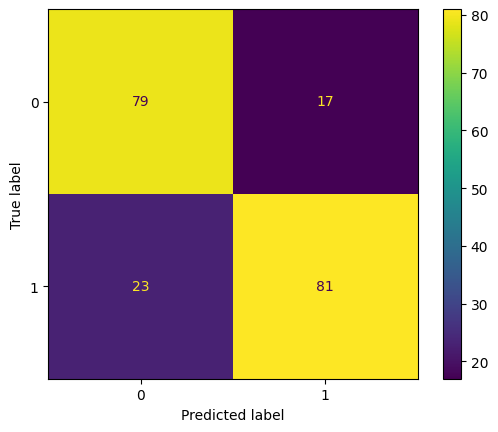

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80        96
           1       0.83      0.78      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



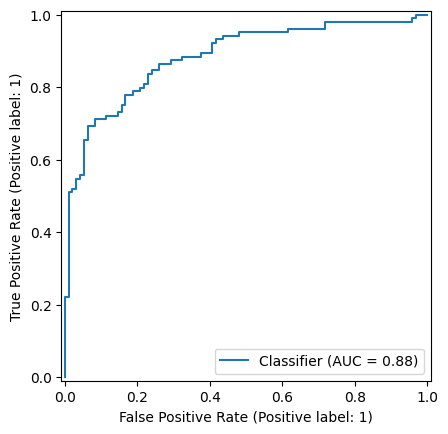

In [29]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)

In [30]:
def predict_sentiment(review: str):
  pre = preprocess_text(review)
  vec = tfidf.transform([pre]).toarray()
  vec_red = svd.transform(vec)
  prob = model.predict(vec_red)
  pred = 1 if prob>=0.5 else 0
  return pred, prob

In [31]:
predict_sentiment("Impressive taste i really liked their pasta")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


(1, array([[0.52834994]], dtype=float32))

In [32]:
predict_sentiment("Bad Ambience I hated it! Service was also so slow...")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


(0, array([[0.07897211]], dtype=float32))

In [33]:
model.save("sentiment.keras")